<a href="https://colab.research.google.com/github/Afanasyy/colab/blob/main/%D0%9F%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Средства для предобработки текста и выделения полезной информации

* Токенизация 
* лемматизация
* стемминг
* частотные 
* удаление стоп-слов

## Установка сторонних библиотек

Сообщество разработчиков создает и совместно использует широкий спектр сторонних библиотек, их можно установить из Интернета и использовать в вашей программе.

Как стандартные библиотеки, они предоставляют стандартизированные решения для многих проблем, возникающих в повседневном программировании + решения для более конкретных ситуаций.

От обработки баз данных до машинного обучения и веб-разработки.

Сторонние библиотеки не присутствуют по умолчанию в Python - их следует сначала установить.

Это можно сделать с помощью инструмента `pip`.

`pip` - это менеджер пакетов для Python.

Он установлен с Python автоматически.

In [ ]:
# Проверить, установлен ли pip
!pip -V

pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


In [ ]:
# Вывести список уже установленных библиотек
!pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.0.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.4
branca                        0.4.2
bs4                           0.0.1
CacheC

In [ ]:
# Установка библиотеку
!pip install camelcase

  Created wheel for camelcase: filename=camelcase-0.2-py3-none-any.whl size=1789 sha256=1f6bf51d550151c5140d5e0b5d9add1aaa986e29cc9c9c5a590675f33d03775c
  Stored in directory: /root/.cache/pip/wheels/5c/15/30/92459bdd828bf363082955935e49d5b3f83f8e32af8aad7e34
Successfully built camelcase


In [ ]:
import camelcase

c = camelcase.CamelCase()

txt = "hello world"

print(c.hump(txt))

Hello World


Дополнительные пакеты можно найти в Индексе пакетов Python (PyPI) - хранилище библиотек для языка программирования Python.

https://pypi.org/

## Библиотека NLTK (Natural Language Processing Toolkit)

Пакет библиотек и программ для символьной и статистической обработки естественного языка, написанных на языке программирования Python.

У NLTK есть легкие в использовании интерфейсы для многих языковых корпусов, а также библиотеки для обработки текстов для классификации, токенизации, стемминга, разметки, фильтрации и семантических рассуждений.

In [ ]:
!pip install -U nltk

     |████████████████████████████████| 1.5 MB 24.9 MB/s 
     |████████████████████████████████| 748 kB 42.4 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
import nltk

In [ ]:
# Для работы могут понадобиться дополнительные данные
# punkt - пунктуация
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Токенизация

Токенизация (иногда – сегментация) по предложениям – это процесс разделения письменного языка на предложения-компоненты. Идея выглядит довольно простой. В английском и некоторых других языках мы можем вычленять предложение каждый раз, когда находим определенный знак пунктуации – точку.

Но даже в английском эта задача нетривиальна, так как точка используется и в сокращениях. Таблица сокращений может сильно помочь во время обработки текста, чтобы избежать неверной расстановки границ предложений. В большинстве случаев для этого используются библиотеки, так что можете особо не переживать о деталях реализации.

Токен  —  это последовательность символов в документе, имеющая значение для анализа. Обычно это отдельные слова, но не всегда. Документ — это коллекция текста. Им может быть твит, книга или что-то еще. 

Признаки хороших токенов:

* Хранятся в перечисляемых структурах (список, генератор) для упрощения анализа в будущем.
* Имеют единый регистр для одной цели.
* Содержат только буквы и цифры.

Токенизация необходима для разделения текста на более мелкие части, с которыми легче работать и из которых можно извлечь полезную информацию.

### Токенизация по предложениям

#### Токенизация с помощью регулярных выражений

In [ ]:
import re

text = '''Привет, меня зовут Андрей. 
Мне 22 года. Я учусь в университете.
Т.к. я учусь - я студент.'''

regexp = r'\.\s'

sentences = re.split(regexp, text)
sentences

['Привет, меня зовут Андрей',
 '\nМне 22 года',
 'Я учусь в университете',
 'Т.к',
 'я учусь - я студент.']

#### Токенизцаия с помощью NLTK

In [ ]:
text = '''Привет, меня зовут Андрей. 
Мне 22 года. 
Я учусь в университете. 
Т.к. я учусь - я студент.'''

sentences = nltk.tokenize.sent_tokenize(text, language='russian')
sentences

['Привет, меня зовут Андрей.',
 'Мне 22 года.',
 'Я учусь в университете.',
 'Т.к. я учусь - я студент.']

### Токенизация по словам

#### Токенизация с помощью регулярных выражений

In [ ]:
text = '''Привет, меня зовут Андрей. 
Мне 22 года. Я учусь в университете. 
Т.к. я учусь - я студент.'''

regexp = r'\w+'

tokens = re.findall(regexp, text)
tokens

['Привет',
 'меня',
 'зовут',
 'Андрей',
 'Мне',
 '22',
 'года',
 'Я',
 'учусь',
 'в',
 'университете',
 'Т',
 'к',
 'я',
 'учусь',
 'я',
 'студент']

### Токенизация с помощью NLTK

In [ ]:
text = '''Привет, меня зовут Андрей. 
Мне 22 года. Я учусь в университете. 
Т.к. я учусь - я студент.'''

tokens = nltk.tokenize.word_tokenize(text, language='russian')
tokens

['Привет',
 ',',
 'меня',
 'зовут',
 'Андрей',
 '.',
 'Мне',
 '22',
 'года',
 '.',
 'Я',
 'учусь',
 'в',
 'университете',
 '.',
 'Т.к.',
 'я',
 'учусь',
 '-',
 'я',
 'студент',
 '.']

## Удаление стоп-слов

Стоп-слова – это слова, которые выкидываются из текста до/после обработки текста. Под стоп-словами обычно понимают артикли, междометия, союзы и т.д., которые не несут смысловой нагрузки. При этом надо понимать, что не существует универсального списка стоп-слов, все зависит от конкретного случая.

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
russian_stop_words = nltk.corpus.stopwords.words('russian')
russian_stop_words

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [ ]:
def remove_stop_words(tokens: str, stop_words: list) -> list:
  clean_tokens = []
  for token in tokens:
    if token not in stop_words:
      clean_tokens.append(token)
  return clean_tokens

In [ ]:
text = '''Привет, меня зовут Андрей. 
Мне 22 года. Я учусь в университете. 
Т.к. я учусь - я студент.'''.lower()

tokens = nltk.tokenize.word_tokenize(text, language='russian')

clean_tokens = remove_stop_words(tokens, russian_stop_words)
clean_tokens

['привет',
 ',',
 'зовут',
 'андрей',
 '.',
 '22',
 'года',
 '.',
 'учусь',
 'университете',
 '.',
 'т.к.',
 'учусь',
 '-',
 'студент',
 '.']

## Лемматизация и стемминг

Обычно тексты содержат разные грамматические формы одного и того же слова, а также могут встречаться однокоренные слова. Лемматизация и стемминг преследуют цель привести все встречающиеся словоформы к одной, нормальной словарной форме.

* Стемминг – это грубый эвристический процесс, который отрезает «лишнее» от корня слов, часто это приводит к потере словообразовательных суффиксов.

* Лемматизация – это более тонкий процесс, который использует словарь и морфологический анализ, чтобы в итоге привести слово к его канонической форме – лемме.

Отличие в том, что стеммер действует без знания контекста и, соответственно, не понимает разницу между словами, которые имеют разный смысл в зависимости от части речи. Однако у стеммеров есть и свои преимущества: их проще внедрить и они работают быстрее. Плюс, более низкая «аккуратность» может не иметь значения в некоторых случаях.

### Стемминг

Русский язык обладает богатой морфологической структурой. Слова *хороший* и *хорошая* имеют тот же смысл, но разную форму, например, *хорошая мебель* и *хороший стул*.

Поэтому при работе с текстом имеет смысл привести слова к их *нормальной* форме.

In [ ]:
stemmer = nltk.stem.SnowballStemmer(language='russian')

In [ ]:
stemmer.stem('хороший')

'хорош'

In [ ]:
stemmer.stem('хорошая')

'хорош'

Проблемы могут возникнуть со словами, которые значительно изменяются в других формах:

In [ ]:
stemmer.stem('хотеть')

'хотет'

In [ ]:
stemmer.stem('хочу')

'хоч'

*Хотеть* и *хочу* — грамматические формы одного и то же слова, но стемминг обрубает окончания согласно своему алгоритму. Поэтому возможно следует применить другой метод — лемматизацию.

### Лемматизация

Над словом можно провести морфологический анализ и выявить его начальную форму. Например: *хочу*, *хотят*, *хотели* имеют начальную форму *хотеть*. 

Для приведения слов к начальной форме можно воспользоваться `pymorphy2` — инструментом для морфологического анализа русского и украинского языков.

In [ ]:
!pip install pymorphy2
!pip install -U pymorphy2-dicts-ru

In [ ]:
import pymorphy2

In [ ]:
morph = pymorphy2.MorphAnalyzer()

In [ ]:
morph.parse('хочу')

[Parse(word='хочу', tag=OpencorporaTag('VERB,impf,tran sing,1per,pres,indc'), normal_form='хотеть', score=1.0, methods_stack=((DictionaryAnalyzer(), 'хочу', 3136, 1),))]

In [ ]:
morph.parse('хочу')[0].normal_form

'хотеть'

In [ ]:
morph.parse('хотят')[0].normal_form

'хотеть'

In [ ]:
morph.parse('хотели')[0].normal_form

'хотеть'

## Частотные слова

Частотный анализ является одним из сравнительно простых методов обработки текста на естественном языке (NLP). Его результатом является список слов, наиболее часто встречающихся в тексте. Частотный анализ также позволяет получить представление о тематике и основных понятиях текста.

Проведение частотного анализа можно условно разделить на несколько этапов:

1. Загрузка и обзор данных
2. Очистка и предварительная обработка текста
3. Удаление стоп-слов
4. Перевод слов в основную форму
5. Подсчёт статистики встречаемости слов в тексте

In [ ]:
# Скачивание файла с "Идиотом" Ф.М. Достоевского
!wget -O idiot.txt https://github.com/d0rj/RusLit/raw/main/prose/Dostoevsky/%D0%98%D0%B4%D0%B8%D0%BE%D1%82.txt

--2022-03-25 12:55:00--  https://github.com/d0rj/RusLit/raw/main/prose/Dostoevsky/%D0%98%D0%B4%D0%B8%D0%BE%D1%82.txt
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/d0rj/RusLit/main/prose/Dostoevsky/%D0%98%D0%B4%D0%B8%D0%BE%D1%82.txt [following]
--2022-03-25 12:55:01--  https://raw.githubusercontent.com/d0rj/RusLit/main/prose/Dostoevsky/%D0%98%D0%B4%D0%B8%D0%BE%D1%82.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2362687 (2.3M) [text/plain]
Saving to: ‘idiot.txt’

idiot.txt           100%[===================>]   2.25M  --.-KB/s    in 0.01s   

2022-03-25 12:55:01 (217 MB/s) - ‘idiot.txt’ sa

In [ ]:
def load_data(path_to_file: str) -> str:
  with open(path_to_file, 'r', encoding='utf-8') as df:
    text = df.read()
    text = text.lower()
    text = text.replace('\n', ' ')
    return text

In [ ]:
text = load_data('idiot.txt').lower()
text[:100]

' часть первая   i  в конце ноября, в оттепель, часов в девять утра, поезд петербургско-варшавской же'

In [ ]:
def extract_tokens(text: str) -> list:
  return nltk.tokenize.word_tokenize(text, language='russian')

In [ ]:
def extract_sentences(text: str) -> list:
  return nltk.tokenize.sent_tokenize(text, language='russian')

In [ ]:
tokens = extract_tokens(text)
print(f'Несколько токенов: {tokens[:10]}')
print(f'Общее количество токенов: {len(tokens)}\n')

sentences = extract_sentences(text)
print(f'Два предложения: {sentences[:2]}')
print(f'Общее количество предложений: {len(sentences)}')

NameError: ignored

In [ ]:
import string

def count_frequencies(tokens: list) -> dict:
  special_symbols = '<>«»-–+\\' + string.punctuation
  
  lemmas = [morph.parse(token)[0].normal_form for token in tokens 
            if token not in special_symbols and token not in russian_stop_words]
  
  return nltk.probability.FreqDist(lemmas)

In [ ]:
word_frequencies = count_frequencies(tokens)
word_frequencies.most_common(5)

[('князь', 2167),
 ('это', 1720),
 ('знать', 849),
 ('всё', 795),
 ('говорить', 790)]

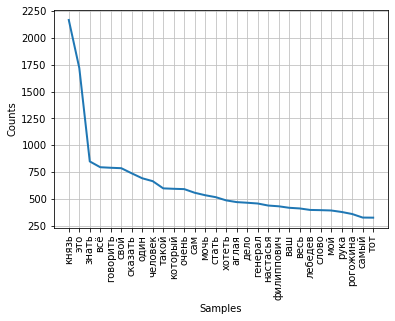

In [ ]:
word_frequencies.plot(30, cumulative=False)

In [ ]:
symbol_frequencies = nltk.probability.FreqDist(text)

In [ ]:
if ' ' in symbol_frequencies:
  symbol_frequencies.pop(' ')
symbol_frequencies.most_common(5)

[('о', 115661), ('е', 91826), ('а', 81719), ('н', 68866), ('и', 65571)]

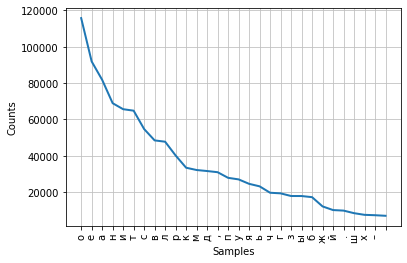

In [ ]:
symbol_frequencies.plot(30, cumulative=False)

## Полезные ссылки

* https://habr.com/ru/company/Voximplant/blog/446738/
* https://www.nltk.org/
* [Статья на Medium](https://medium.com/@bigdataschool/%D0%BF%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0-%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0-%D0%B2-nlp-82c164bb7416)
* https://nuancesprog.ru/p/5870/
* https://habr.com/ru/post/517410/